# Feature Engineering

Identify the revelant Features using statistical Analysis

Plot and using the Correlations heatmap for further analysis

In [1]:
# Checking the features Correlations (Healmap Analysis)
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Now Loading the Clean DataSets
df = pd.read_csv("cleaned_healthcare_market_trends.csv")

In [3]:
# Compute the Correlations Matrix
corr_matrix = df.corr()

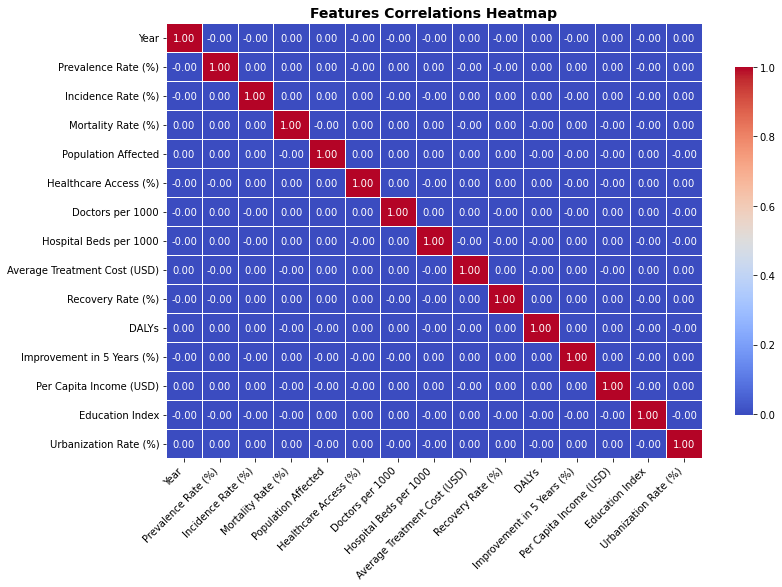

In [4]:
# Visualiztion the Correlations using Heatmap
plt.figure(figsize = (12, 8))
sns.heatmap(corr_matrix, annot = True, cmap = "coolwarm", fmt = ".2f", linewidths = 0.5, cbar_kws={"shrink": 0.8})
plt.title("Features Correlations Heatmap", fontsize = 14, fontweight = "bold")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Save the heatmap
OUTPUT_PATH = "correlation_heatmap.png"
plt.savefig(OUTPUT_PATH, dpi=300, bbox_inches="tight")

plt.show()

In [5]:
print(df.dtypes)

Country                                object
Year                                    int64
Disease Name                           object
Disease Category                       object
Prevalence Rate (%)                   float64
Incidence Rate (%)                    float64
Mortality Rate (%)                    float64
Age Group                              object
Gender                                 object
Population Affected                   float64
Healthcare Access (%)                 float64
Doctors per 1000                      float64
Hospital Beds per 1000                float64
Treatment Type                         object
Average Treatment Cost (USD)          float64
Availability of Vaccines/Treatment     object
Recovery Rate (%)                     float64
DALYs                                 float64
Improvement in 5 Years (%)            float64
Per Capita Income (USD)               float64
Education Index                       float64
Urbanization Rate (%)             

In [ ]:
# Perform Statistical Tests feature Analysis:
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import LabelEncoder

# Define the features (X) and target variable (y)
if "Healthcare Access (%)" in df.columns:
    X = df.drop(columns=["Healthcare Access (%)"])
    y = df["Healthcare Access (%)"]
else:
    raise KeyError("Column 'Healthcare Access (%)' not found in dataframe!")

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Apply Label Encoding (or use One-Hot Encoding)
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

# Compute the mutual information scores
mi_scores = mutual_info_regression(X, y)
mi_scores = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)

print(mi_scores)

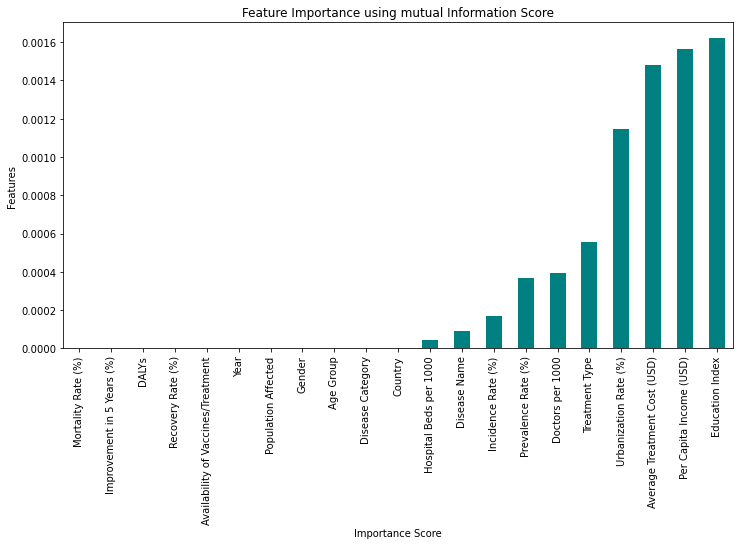

In [8]:
# Now plotting the features importance
plt.figure(figsize = (12, 6))
mi_scores.sort_values(ascending = True).plot(kind = "bar", color = "teal")
plt.title("Feature Importance using mutual Information Score")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

In [ ]:
# Select feature based on Statistical Tests
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

# Now defining the model for feature selection
model = RandomForestRegressor()

# Now Applying the Recursive Feature Elimination
# In this line of code select the top 5 features
rfe = RFE(model, n_features_to_select = 5)
X_selected = rfe.fit_transform(X, y)

# Getting the selected features
selected_features = X.columns[rfe.support_]
print("The Selected Features is that: ", list(selected_features))